# CSCI2000U – Scientific Data Analysis
## Assignment 1 - NBA Data Analysis
### Einsten Augustine – 100874008

## Introduction

The NBA (National Basketball Association) is widely viewed by many people around the world, and includes many notable players. Each player has worked tirelessly to get to the position that they are in, and as a result of their efforts, they win championships for their respective teams. On sport sites such as ESPN and SportsNet, fans can easily view their favorite statistic of their favorite player on their websites. I found this dataset on Kaggle, and it includes 559 NBA players' data from 2021 - 2022, with various player characteristics. I chose this dataset because I really enjoyed playing basketball growing up, and also enjoyed watching the sport at home and in person.

In this assignment, I'll be going over various player statistics, including age, height, salary, and more to explore more about the player-statistic relationship. Based on these various characteristics, I'm going to be making hypotheses on 3 topics that I think are interesting from the dataset.

#1. Does player salary increase as a player ages?
	I think in general they do, as many players have their "prime" years later on in their career, not so much in their debut year.
#2. What player position gets paid the most?
	I would assume guards get paid the most as usually they are the top point scorer, however there have been instances where that can deviate
#3. How do physical attributes vary between player position and actual attributes
	Centers should be taller and heavier, and in general guards should be lighter and shorter. I believe this can definitely vary however.

Here I'm just inserting the libraries, setting the style, initializing the csv file "active_players_2.csv", and printing how many rows are present in the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

nba_data = pd.read_csv('active_players_2.csv')

print(f"Total number of players: {len(nba_data)}")

Total number of players: 558


## Analysis
### Understanding the Data

Once the dataset is ready, I'm displaying the number of rows and columns, and the first 10 entries. Note that some entries contain "NaN" in the data, we'll consider this later on

In [47]:
print("Dataset shape:", nba_data.shape)
print(f"Rows: {nba_data.shape[0]}, Columns: {nba_data.shape[1]}")

display(nba_data.head(10))

Dataset shape: (558, 9)
Rows: 558, Columns: 9


,Name,Team,Position,Age,Height,Height_i,Weight,College,Salary
0,Juhann Begarin,Boston Celtics,SG,19,"6' 5""",6.50,185,NaN,NaN
1,Jaylen Brown,Boston Celtics,SG,24,"6' 6""",6.60,223,California,26758928.0
2,Kris Dunn,Boston Celtics,PG,27,"6' 3""",6.30,205,Providence,5005350.0
3,Carsen Edwards,Boston Celtics,PG,23,"5' 11""",5.11,200,Purdue,1782621.0
4,Tacko Fall,Boston Celtics,C,25,"7' 5""",7.50,311,UCF,NaN
5,Bruno Fernando,Boston Celtics,F,23,"6' 9""",6.90,240,Maryland,1782621.0
6,Al Horford,Boston Celtics,C,35,"6' 9""",6.90,240,Florida,27000000.0
7,Enes Kanter,Boston Celtics,C,29,"6' 10""",6.10,250,Kentucky,1669178.0
8,Luke Kornet,Boston Celtics,C,26,"7' 2""",7.20,250,Vanderbilt,NaN
9,Romeo Langford,Boston Celtics,SG,21,"6' 4""",6.40,216,Indiana,3804360.0


Some info about the Dataset and the list of the column names

In [48]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      558 non-null    object 
 1   Team      558 non-null    object 
 2   Position  558 non-null    object 
 3   Age       558 non-null    int64  
 4   Height    558 non-null    object 
 5   Height_i  558 non-null    float64
 6   Weight    558 non-null    int64  
 7   College   485 non-null    object 
 8   Salary    445 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 39.4+ KB


In [ ]:
print("Column Names:")
print(list(nba_data.columns))

Column Names:
['Name', 'Team', 'Position', 'Age', 'Height', 'Height_i', 'Weight', 'College', 'Salary']


### Data Cleaning

The dataset contains some "nan" strings which don't actually align with the "NaN" data type and won't let us do some calculations, so we need to take care of that. Some of the numerical columns also are stored as object types, and those need to be converted to floats. For the players who don't have publicly displayed information, we'll need to consider that early on, which is what the missing data part is for. Duplicate entries weren't present in this dataset, as players names are well organized. As a result, the missing data only affects Salary and the College they went to.

In [ ]:
nba_data.replace('nan', np.nan, inplace=True)

nba_data['Salary'] = pd.to_numeric(nba_data['Salary'], errors='coerce')
nba_data['Age'] = pd.to_numeric(nba_data['Age'], errors='coerce')
nba_data['Weight'] = pd.to_numeric(nba_data['Weight'], errors='coerce')
nba_data['Height_i'] = pd.to_numeric(nba_data['Height_i'], errors='coerce')

print("Data types after cleaning:")
print(nba_data.dtypes)

Data types after cleaning:
Name         object
Team         object
Position     object
Age           int64
Height       object
Height_i    float64
Weight        int64
College      object
Salary      float64
dtype: object


### Missing Data Analysis

In [ ]:
missing_data = pd.DataFrame({
    'Column': nba_data.columns,
    'Missing_Count': nba_data.isnull().sum(),
    'Missing_Percent': (nba_data.isnull().sum() / len(nba_data) * 100).round(2)
})

display(missing_data)

print(f"\nPlayers with complete salary data: {nba_data['Salary'].notna().sum()}")
print(f"Players with missing salary data: {nba_data['Salary'].isna().sum()}")

Missing Data Summary:


,Column,Missing_Count,Missing_Percent
Name,Name,0,0.00
Team,Team,0,0.00
Position,Position,0,0.00
Age,Age,0,0.00
Height,Height,0,0.00
Height_i,Height_i,0,0.00
Weight,Weight,0,0.00
College,College,73,13.08
Salary,Salary,113,20.25



Players with complete salary data: 445
Players with missing salary data: 113


### Descriptive Statistics

Before comparing attributes against each other, we can compare them in their own individual attributes. I've listed various statictical attributes including mean, standard deviation, min, max, and quartile.

In [53]:
stat_columns = ['Age', 'Height_i', 'Weight', 'Salary']
descriptive_stats = nba_data[stat_columns].describe()

print("Descriptive Statistics:")
display(descriptive_stats.round(2))

Descriptive Statistics:


,Age,Height_i,Weight,Salary
count,558.00,558.00,558.00,445.00
mean,25.54,6.49,216.16,8813695.58
std,4.32,0.34,24.57,9886777.01
min,18.00,5.10,160.00,925258.00
25%,22.00,6.20,199.25,1802057.00
50%,25.00,6.50,215.00,4447896.00
75%,28.00,6.70,233.00,12000000.00
max,41.00,7.50,311.00,45780966.00


Now using Seaborn and Matplotlib, we can analyze specific types of data against each other using distribution graphs, bar graphs, and scatter plots

## Exploratory Data Analysis
### Analysis 1: Salaries across Players


I wanted to exceplify the fact that most NBA players by count are making less than 5 million, and that only the top level players are getting paid multimillions

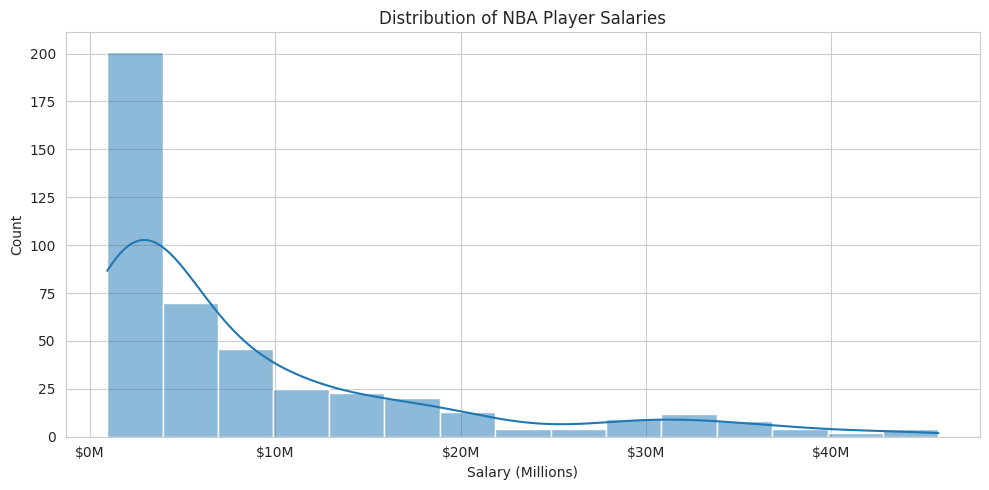

In [56]:
salary_data = nba_data[nba_data['Salary'].notna()]['Salary']

plt.figure(figsize=(10, 5))
sns.histplot(salary_data, bins=15, kde=True)
plt.title("Distribution of NBA Player Salaries")
plt.xlabel("Salary (Millions)")
plt.ylabel("Count")

ax = plt.gca()
ax.set_xticks([0, 10000000, 20000000, 30000000, 40000000])
ax.set_xticklabels(['$0M', '$10M', '$20M', '$30M', '$40M'])

plt.tight_layout()
plt.show()

### Analysis 2: Age Group Analysis

The purpose of this table is to understand how many players are at each age group. As we can see, most are in the younger age group, but don't get paid as much as veteran and senior players.

In [ ]:
nba_data['Age_Group'] = pd.cut(nba_data['Age'],
                                bins=[0, 23, 27, 32, 50],
                                labels=['Young (19-23)', 'Prime (24-27)',
                                       'Veteran (28-32)', 'Senior (33+)'])

age_group_analysis = nba_data.groupby('Age_Group').agg({
    'Salary': ['mean', 'median', 'count'],
    'Height_i': 'mean',
    'Weight': 'mean'
}).round(2)

print("Player Characteristics by Age Group:")
display(age_group_analysis)

Player Characteristics by Age Group:


Salary                  Height_i  Weight
                        mean     median count     mean    mean
Age_Group                                                     
Young (19-23)     4650378.22  3000000.0   161     6.50  212.78
Prime (24-27)     9189686.13  4533315.0   134     6.50  217.04
Veteran (28-32)  13533376.38  9720900.0   113     6.47  218.29
Senior (33+)     11153896.32  5000000.0    37     6.48  222.82

## Data Visualizations
### Visualization 1: Average Height and Weight by Position

This specific graph compares height/weight by position. By looking at this data, we can easily tell that centers are heavier and taller, while guards are lighter and shorter in general

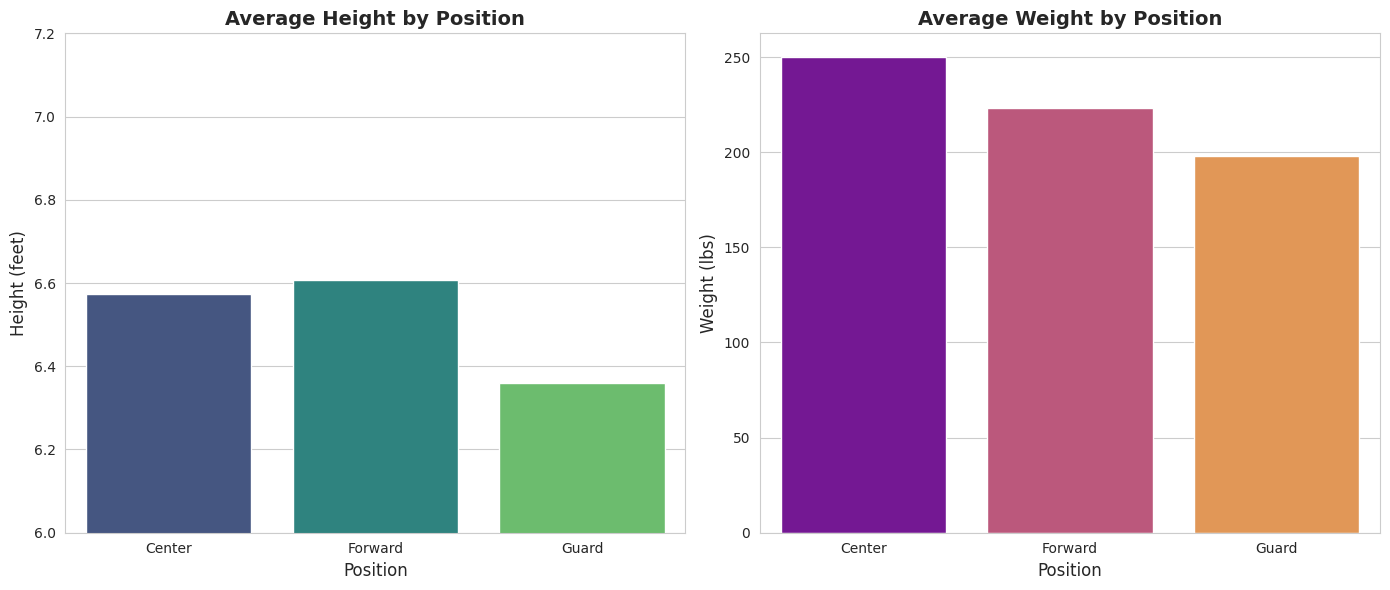

In [69]:
def char_values(n):
    if pd.isna(n):
        return 'Unknown'
    n = str(n).upper()
    if 'G' in n:
        return 'Guard'
    elif 'F' in n:
        return 'Forward'
    elif 'C' in n:
        return 'Center'
    else:
        return 'Unknown'

nba_data['Position_Category'] = nba_data['Position'].apply(char_values)
position_physical = nba_data.groupby('Position_Category').agg({
    'Height_i': 'mean',
    'Weight': 'mean'
}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=position_physical, x='Position_Category', y='Height_i',
            palette='viridis', ax=ax1)
ax1.set_title('Average Height by Position', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position', fontsize=12)
ax1.set_ylabel('Height (feet)', fontsize=12)
ax1.set_ylim(6, 7.2)

sns.barplot(data=position_physical, x='Position_Category', y='Weight',
            palette='plasma', ax=ax2)
ax2.set_title('Average Weight by Position', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position', fontsize=12)
ax2.set_ylabel('Weight (lbs)', fontsize=12)

plt.tight_layout()
plt.show()

### Visualization 2: Salary Comparison Across Positions

Here I'm comparing the salary versus the position. The median is there for reference, which displays a pretty balanced distribution. Guards are paid more than other positions, but not by much

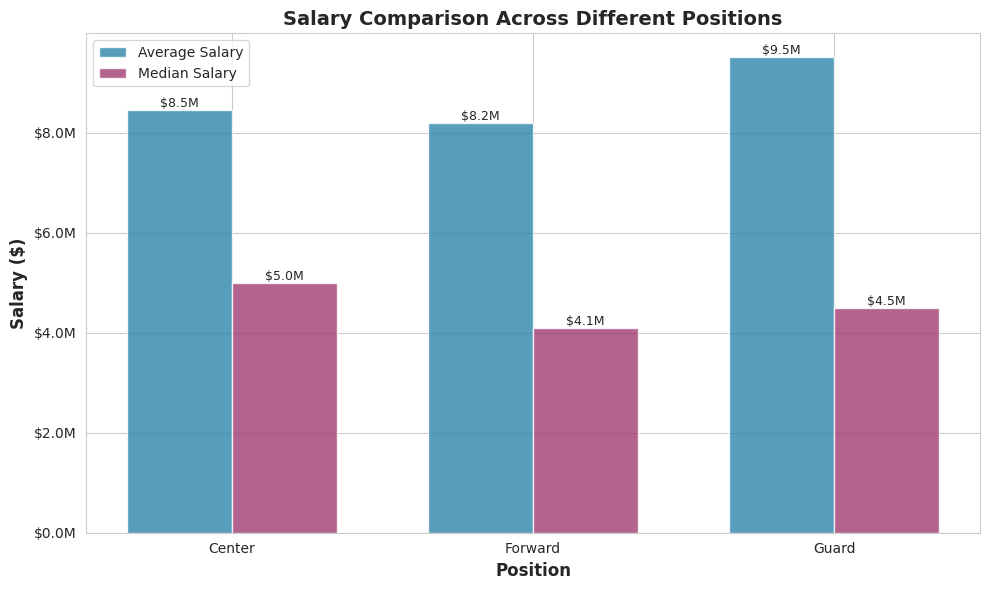

In [65]:
position_salary = nba_data.groupby('Position_Category')['Salary'].agg(['mean', 'median', 'count']).reset_index()
position_salary = position_salary[position_salary['Position_Category'] != 'Unknown']

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(position_salary))
width = 0.35

bar1 = ax.bar(x - width/2, position_salary['mean'], width,
               label='Average Salary', color='#2E86AB', alpha=0.8)
bar2 = ax.bar(x + width/2, position_salary['median'], width,
               label='Median Salary', color='#A23B72', alpha=0.8)

ax.set_xlabel('Position', fontsize=12, fontweight='bold')
ax.set_ylabel('Salary ($)', fontsize=12, fontweight='bold')
ax.set_title('Salary Comparison Across Different Positions', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(position_salary['Position_Category'])
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height/1e6:.1f}M',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Visualization 3: Age vs Salary Trend Analysis

Based on the average trends, salaries tend to increase as players enter their "prime"

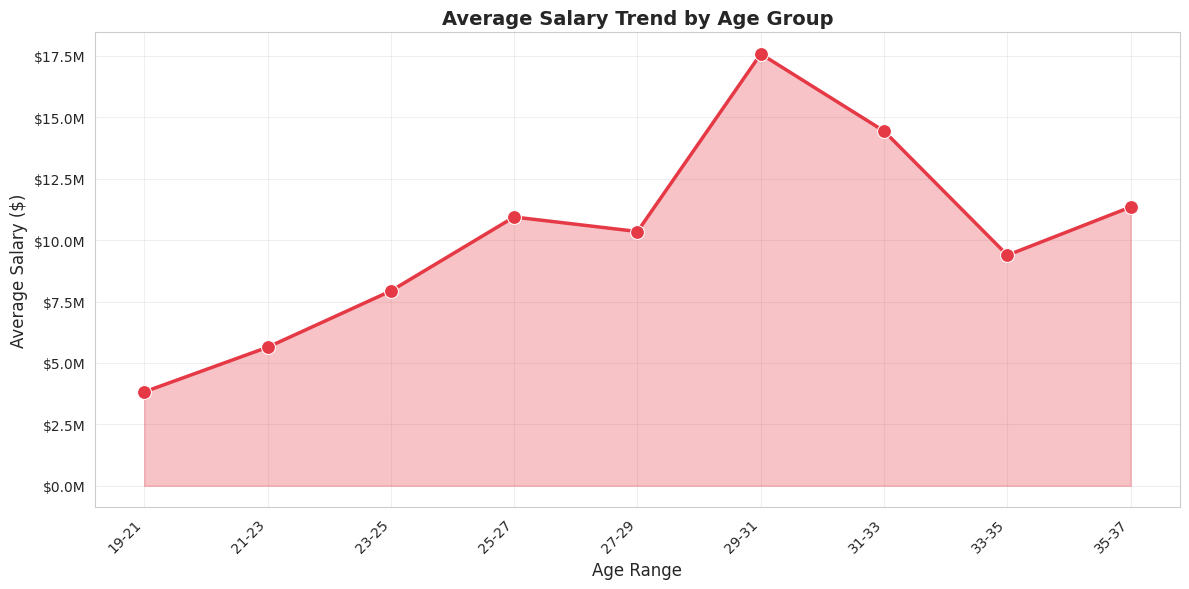

In [60]:
nba_data['Age_Bin'] = pd.cut(nba_data['Age'], bins=range(19, 42, 2))

age_salary_trend = nba_data.groupby('Age_Bin')['Salary'].agg(['mean', 'count']).reset_index()
age_salary_trend = age_salary_trend[age_salary_trend['count'] >= 5]

age_salary_trend['Age_Label'] = age_salary_trend['Age_Bin'].astype(str).str.replace(r'\(|\]|\[', '', regex=True).str.replace(', ', '-')

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_salary_trend, x='Age_Label', y='mean',
             marker='o', markersize=10, linewidth=2.5, color='#E63946')
plt.fill_between(range(len(age_salary_trend)), age_salary_trend['mean'],
                 alpha=0.3, color='#E63946')

plt.title('Average Salary Trend by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Visualization 4: Top 15 Highest Paid Players

This statistic only really tells us that point guards generally are in the top 15 list. It's interesting to see that each team designates 1-2 star players the highest salary bracket, while the rest of the team is paid a more consistant salary

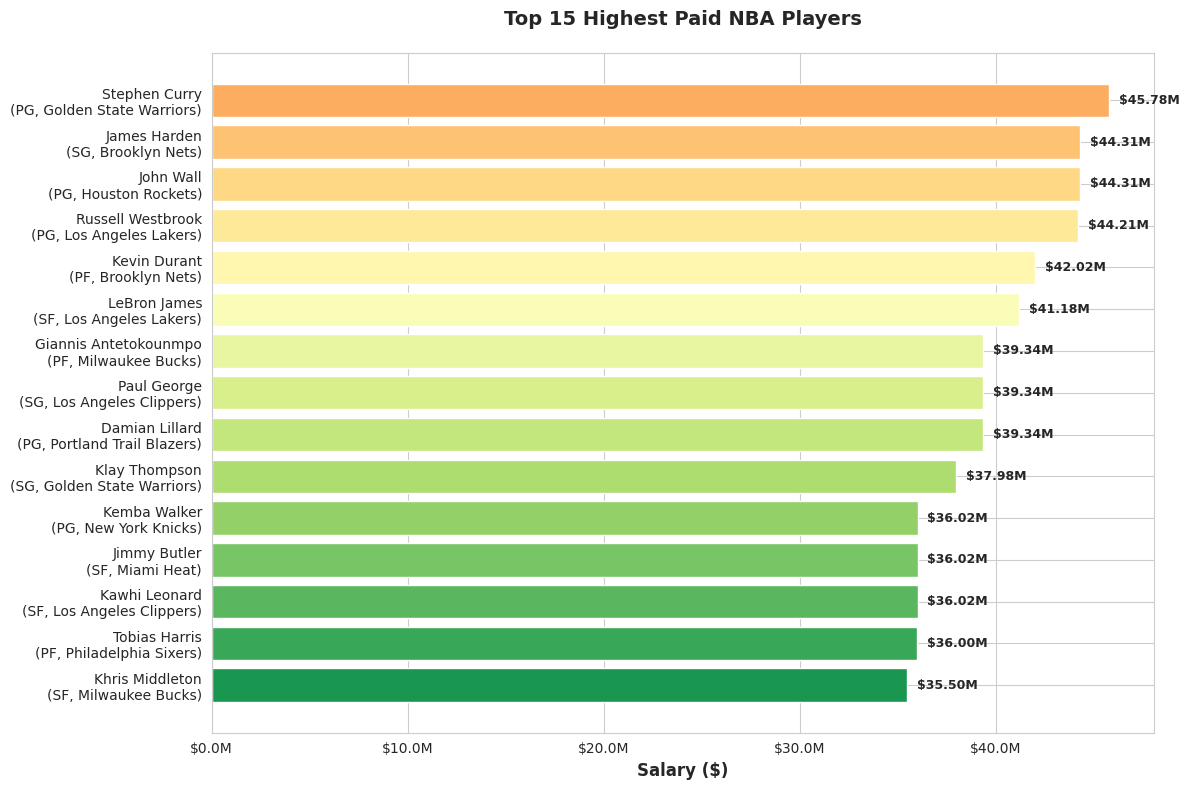

In [61]:
high_grossing = nba_data.nlargest(15, 'Salary')[['Name', 'Team', 'Position', 'Age', 'Salary']]

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(high_grossing)))

bars = plt.barh(range(len(high_grossing)), high_grossing['Salary'], color=colors)
plt.yticks(range(len(high_grossing)), [f"{row['Name']}\n({row['Position']}, {row['Team']})"
                                   for _, row in high_grossing.iterrows()])
plt.xlabel('Salary ($)', fontsize=12, fontweight='bold')
plt.title('Top 15 Highest Paid NBA Players', fontsize=14, fontweight='bold', pad=20)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

for i, (bar, salary) in enumerate(zip(bars, high_grossing['Salary'])):
    plt.text(salary + 500000, bar.get_y() + bar.get_height()/2,
             f'${salary/1e6:.2f}M',
             va='center', fontsize=9, fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Discussion

### Key Findings

After analyzing the NBA 2021-2022 dataset, we can make some interesting insights and observations. As stated in one of my hypotheses, centers are taller and heavier, averaging around 7 ft, and weighing around 250 lbs. This confirms their role as the player who plays mainly in the paint, fighting for rebounds, which requires alot of physical contact. On the other hand, guards are shorter, lighter, and faster for the speed they need, while forwards are somewhat of the middle ground. This can be confirmed in Visualization 1, and isn't much of a surprise, but it's interesting to see data follow these trends.

Players regardless of position get paid around the same, however using our graphs, we proved that the top players each significantly more than the typical player. In general, it skews the mean because of the salary gap. When we compare the age-salary comparison, we actually see an interesting pattern, following a trend many know as the "standard distribution". When rookie players start out, they each lower salaries compared to veteran players, but there is fall off on pay as a player inches closer to retirement. It's honestly a balance between experience and declining athletic performance that causes the falloff.

Most datasets aren't perfect, and that includes this one. This dataset includes 8 columns that are helpful to predict trends, however they don't include any type of game statistic, or even average game statistic. That would require many more columns, as there are many types of variables that influence the decision of a game. A more comprehensive dataset would include these performance metrics, such as player point, rebounds, steals, 3 point percentage, and more. These would better help us to understand the questions being raised in this assignment.


## AI Disclosure
I used ChatGPT for some parts of this assignment. This mainly includes the formatting for all the graphs and some code formatting, after following the example EDA. All insights were written by me.

## References

**Dataset:**
- NBA Player Statistics Dataset (2021-2022 Season)
- Source: https://www.kaggle.com/datasets/buyuknacar/202122-nba-season-active-nba-players

**Additional Resources:**
- NBA Official Statistics: https://www.nba.com/stats/
- ESPN Page: https://www.espn.com/nba/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving active_players_2.csv to active_players_2 (1).csv
